In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from IPython.display import Image

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('/Users/balance/Desktop/udacity-review/A-B Test/Practical_Statistics/data/coffee_dataset.csv')
sample_data = full_data.sample(200)

In [2]:
sample_data

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120
...,...,...,...,...
1187,6237,<21,False,62.493744
463,1857,<21,False,66.476106
1195,6397,<21,False,64.555794
1080,4065,<21,False,66.842149


In [3]:
sample_data.shape

(200, 4)

1. If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be? Write them in the cell below, and use your answer to answer the first quiz question below.

#### Since there is no directional component associated with this statement, a not equal to seems most reasonable.

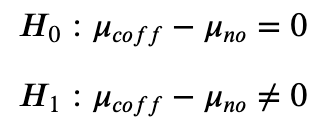

In [106]:
e

2. If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative be? Place them in the cell below, and use your answer to answer the second quiz question below.

In this case, there is a question associated with a direction - that is the average height for coffee drinkers is less than non-coffee drinkers. Below is one of the ways you could write the null and alternative. Since the mean for coffee drinkers is listed first here, the alternative would suggest that this is negative.

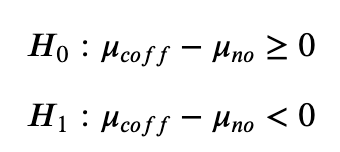

In [107]:
Image(filename='/Users/balance/Desktop/3.png')

3. For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample. You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means. Use the results of your sampling distribution, to answer the third quiz question below

In [6]:
nocoff_means, coff_means, diffs=[], [],[]

for _ in range (10000):
    bootsamp=sample_data.sample(200, replace=True)
    coff_mean=bootsamp[bootsamp['drinks_coffee']==True]['height'].mean()
    nocoff_mean=bootsamp[bootsamp['drinks_coffee']==False]['height'].mean()
    
    coff_means.append(coff_mean)
    nocoff_means.append(nocoff_mean)
    diffs.append(coff_mean-nocoff_mean)
    
    

In [15]:
coff_mean, nocoff_mean

(67.76046797870424, 66.54483902806783)

In [102]:
len(diffs)

10000

In [18]:
testsample=sample_data.sample(200,replace=True)
cofftest=testsample[testsample['drinks_coffee']==True]['height'].mean()
nocoffeetest=testsample[testsample['drinks_coffee']==False]['height'].mean()

In [21]:
testsample.shape

(200, 4)

In [28]:
coff_means

[68.62126858133244,
 68.08739477707392,
 68.17764884912127,
 68.18923247535511,
 68.58444118753478,
 68.1374185971409,
 68.2812117705514,
 68.19743475621509,
 67.7739263955255,
 67.97211975307653,
 68.21423443272572,
 68.29278481039007,
 67.83090950199632,
 68.10499417520556,
 68.4496522606532,
 68.21760884935269,
 68.58018582654255,
 67.82959651151015,
 67.9258232546535,
 67.72794374562947,
 67.92114224444283,
 67.93897545801033,
 68.04211404203753,
 68.17372487732409,
 68.30008547143451,
 68.17083108870445,
 67.94456564848709,
 68.09906596532595,
 68.35992488483318,
 67.87539422172685,
 68.21953866181786,
 67.92737698755803,
 67.93404678351523,
 67.78375672474638,
 67.94345356498448,
 68.2268158309115,
 68.04006041594319,
 68.07341784067907,
 68.20267124875237,
 68.48022320904224,
 68.32150262376845,
 68.28329268311437,
 68.10486696895596,
 67.74844884390488,
 68.473474900394,
 68.38992773818754,
 68.25897019402102,
 68.34188552763896,
 68.39121049736787,
 68.21331524595188,
 67.6750

In [43]:
test20=[]

for _ in range (20):
   
    test21=[1,2,3,4,5,6,7,8,9,10]
    test22=(random.choice(test21))
    
    test20.append(test22)
    

In [44]:
test20

[9, 6, 10, 5, 7, 6, 1, 6, 3, 7, 9, 7, 1, 1, 3, 8, 8, 2, 2, 4]

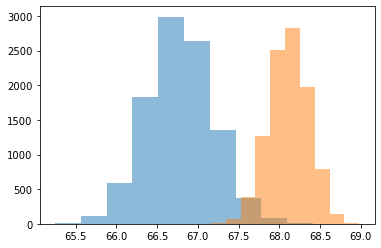

In [10]:
plt.hist(nocoff_means, alpha=0.5);
plt.hist(coff_means, alpha=0.5);

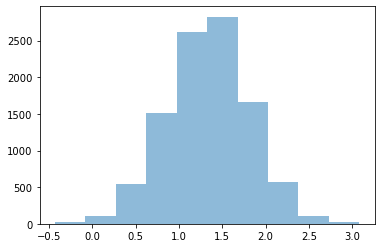

In [45]:
plt.hist(diffs, alpha=0.5);

In [46]:
null_vals=np.random.normal(0, np.std(diffs),10000)

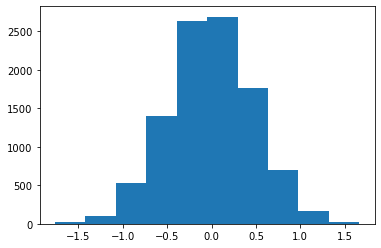

In [48]:
## #Here is the sampling distribution of the di
plt.hist(null_vals);

Quiz 1 : Use the first question above to match the null and alternative to appropriate statements. 

### Null 
The average height for all coffee drinkers is the same as the average height for all non-coffee drinkers.

### Alternative
The average height for all coffee drinkers is not the same as the average height for all non-coffee drinkers

Quiz 2: Use the second question above to match the null and alternative to the appropriate statements.

### Null
The average height for all coffee drinkers is the same or greater than the average height for all non-coffee drinkers.

### Alternative
The average height for all coffee drinkers is less than the average height for all non-coffee drinks.

### Calculating P-value

-Simulate the values of your statistic that are possible from the null.

-Calculate the value of the statistic you actually obtained in your data.

-Compare your statistic to the values from the null.

-Calculate the proportion of null values that are considered extreme based on your alternative.

In [115]:
sample_df=full_data.sample(150)
sample_df.head(5)

,user_id,age,drinks_coffee,height
2101,7506,<21,False,64.588932
1619,2488,<21,False,64.251475
2120,5673,>=21,True,73.311031
1050,7554,>=21,True,67.477379
1865,2253,>=21,True,74.242965


In [113]:
bootsample=sample_df.sample(150, replace=True)

In [116]:
bootsample.head(5)

,user_id,age,drinks_coffee,height
1163,4648,>=21,True,67.901175
1918,5486,>=21,True,65.864238
302,3972,>=21,False,69.520553
706,6833,>=21,True,69.121677
1645,6839,<21,False,63.575874


In [121]:
## Bootstrap from the sample
means= []

for _ in range(10000):
    bootsample = sample_df.sample(150, replace=True)
    means.append(bootsample.height.mean())


In [127]:
len(bootsample)

150

In [124]:
len(means)

10000

In [122]:
np.std(means)

0.22479837204125436

In [130]:
means

[67.85331870287258,
 67.99055320237838,
 68.02234676393604,
 67.67851288424674,
 67.61020542304114,
 67.71768569033556,
 67.65393923395666,
 67.90222554216925,
 67.602280161994,
 67.83034454162488,
 68.02464662809149,
 67.9393826291749,
 67.72670888269514,
 67.84961355680616,
 67.64114161701423,
 67.91526279058154,
 67.64308190638414,
 67.90523232801625,
 67.8214670659879,
 67.9660023891177,
 67.75522945836329,
 67.72251084815281,
 67.86719964049446,
 67.86862929303913,
 68.25347232503523,
 67.76478118650917,
 67.70056623014952,
 67.95425890526379,
 67.6046291076834,
 67.89528949298528,
 67.91352323002164,
 67.65397628044596,
 67.93832740589494,
 67.9015887943326,
 67.6023402566948,
 67.62231320770023,
 67.94860417415559,
 67.65312596180786,
 67.8177042176725,
 67.71397250860976,
 67.52358722199754,
 67.63877423717462,
 68.41860631864519,
 67.84363703069582,
 67.34648485920529,
 67.65697557764621,
 67.98502141475082,
 68.19978091698883,
 67.84138440977506,
 67.76949985576724,
 67.47019

In [131]:
## create a random sample for the null values
null_vals=np.random.normal(70, np.std(means),10000)

In [132]:
len(null_vals)

10000

In [133]:
null_vals

array([70.01438804, 70.28588974, 70.37152584, ..., 69.90195329,
       69.8599157 , 69.58182851])

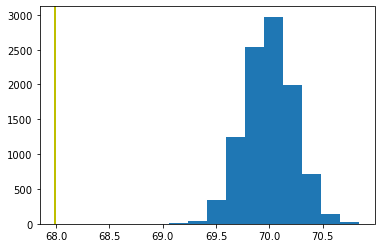

In [134]:
#Plot the null values
plt.hist(null_vals);
plt.axvline(bootsample.height.mean(), color='y', linewidth=2)

In [144]:
sample_mean=bootsample.height.mean()

In [145]:
sample_mean

67.98970263011347

In [147]:
null_vals.mean()

70.00165161144947

In [136]:
(null_vals > sample_mean).mean()

1.0

In [137]:
(null_vals < sample_mean).mean()

0.0

In [148]:
null_mean = 70
(null_vals < sample_mean).mean() + (null_vals > null_mean +(null_mean - sample_mean)).mean()

0.0

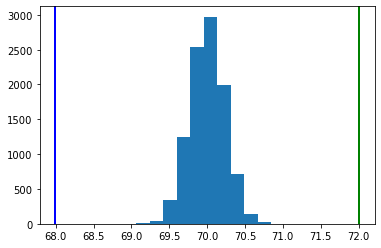

In [150]:
low = sample_mean
high = null_mean + (null_mean - sample_mean)

plt.hist(null_vals);
plt.axvline(low,color='b', linewidth=2)
plt.axvline(high,color='g', linewidth=2)

### How to use Simulations for Hypothesis Tests

For this first example, we would like to conduct a hypothesis test to see if a six-sided die is equally weighted (if all 6 numbers are equally likely). Our null hypothesis for this test will be that all numbers are equally likely to be rolled.
We will imagine that a die has an unknown probability of rolling a 1 of 20% and a 16% chance of rolling each of the other 5 numbers


https://towardsdatascience.com/how-to-use-simulations-for-hypothesis-tests-6f0ac53a9c8f

In [52]:
random.seed(100)
pop=[1,2,3,4,5,6]
weights= [0.2, 0.16, 0.16, 0.16, 0.16, 0.16]
skewed = random.choices (pop, weights=weights, k=200)

In [75]:
skewed.count(1)

46

In [103]:
len(skewed)

200

After observing 200 rolls (generated from the code above), we count the number of each number being rolled using the below function:

In [61]:
def count_occurences(data, minimum=1, maximum=6):
    counter={num: 0 for num in range(minimum, maximum+1)}
    for roll in data:
        counter[roll] +=1
    return counter

In [77]:
skewed_dist = count_occurences(skewed)
skewed_dist

{1: 46, 2: 29, 3: 27, 4: 39, 5: 29, 6: 30}

If the die was equally weighted, we would expect that the number for each of these rolls would be about 32 as we rolled the die 200 times and each number should have a probability of 16.67% (1/6) of showing up. We notice that the number of 1’s is especially large and would like to test if this could be due to chance.
Since we already know the underlying probabilities of each number occurring in a fair die, we can simulate thousands of dice rolls and see how likely it is to observe 46 ones in a set of 200 rolls.
We can generate 100 trials of 200 fair-die rolls using the code below:

In [81]:
rolls_dist_100 = [[random.randint(1,6) for rolls in range(200)] for num_trials in range(100)]


In [104]:
len(rolls_dist_100)

100

How many trials should we simulate? Are 100 trials enough? This is an important thing to consider. Let’s see the distribution of the number of ones we see in different numbers of trials.

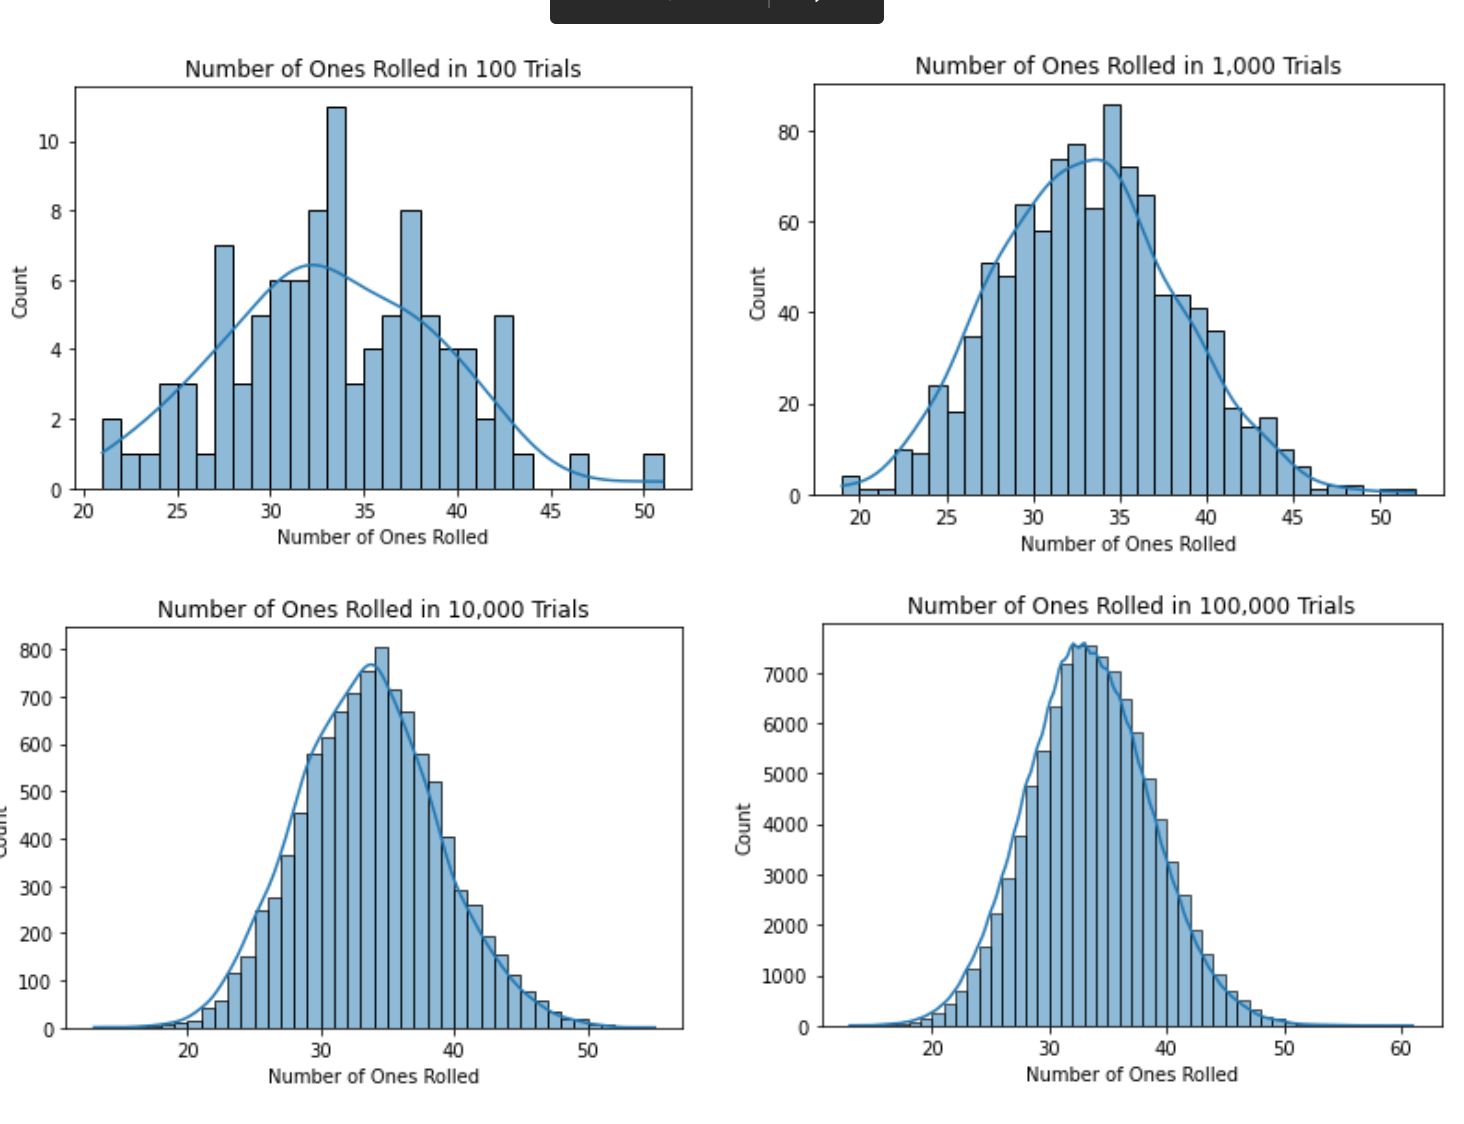

In [87]:
Image(filename='/Users/balance/Desktop/1.png')

## Method 2: Permutation Hypothesis Test

In [88]:
## we generate the data using the followiing code:

pop = [1, 2, 3, 4, 5, 6]
weights_skewed = [.2, .16, .16, .16, .16, .16]
random.seed(100)
rolls_vs = [random.choices(pop, k=200) if person != 0 else random.choices(pop, weights=weights_skewed, k=200) for person in range(1000)]

In [90]:
df_vs=pd.DataFrame(list(map(count_occurences, rolls_vs)))

In [91]:
perms=[np.random.permutation(df_vs[1])[0] for i in range(100000)]

In [105]:
len(perms)

100000

In [ ]:
## We find the p-value of observing a value of 46 or higher given the distribution.

In [92]:
sum([1 if 46 <= x else 0 for x in perms])/100000

0.01753

We get a p-value of 0.017. This is a pretty low probability but not completely unbelievable. We would expect to see this type of performance about 1 in 100 times. We should be skeptical of this performance and potentially believe that the player could have cheated in this tournament. If this were another test in a research setting, we would have enough evidence to reject the null hypothesis that the results we observed were due to chance in favor of our alternative hypothesis that the player is using a skewed die.

#### Conclusion
We now have two more tools as data scientists to conduct hypothesis testing. With just a few lines of code, we are able to test these hypotheses with very few assumptions. We don’t need the typical assumption about the normality of the data often required in hypothesis testing.
These tools have some interesting applications outside of analyzing dice rolls. We now have the basic building blocks to analyze these questions. These types of tests have been applied to interesting problems such as assessing judging bias in Olympic diving and assessing the existence of the hot hand in basketball

## Calculating Errors

Calculating Errors
Here are two datasets that represent two of the examples you have seen in this lesson.

One dataset is based on the parachute example, and the second is based on the judicial example. Neither of these datasets is based on real people.

Use the exercises below to assist in answering the quiz questions at the bottom of this page

In [152]:
import numpy as np
import pandas as pd

jud_data = pd.read_csv('/Users/balance/Desktop/udacity-review/Practical Statistics/judicial_dataset_predictions.csv')
par_data = pd.read_csv('/Users/balance/Desktop/udacity-review/Practical Statistics/parachute_dataset.csv')

In [153]:
jud_data.head()

,defendant_id,actual,predicted
0,22574,innocent,innocent
1,35637,innocent,innocent
2,39919,innocent,innocent
3,29610,guilty,guilty
4,38273,innocent,innocent


In [154]:
par_data.head()

,parachute_id,actual,predicted
0,3956,opens,opens
1,2147,opens,opens
2,2024,opens,opens
3,8325,opens,opens
4,6598,opens,opens


1. Above, you can see the actual and predicted columns for each of the datasets. Using the jud_data, find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type. Use the results to answer the questions in quiz 1 below

In [155]:
# Number of errors
jud_data[jud_data['actual'] != jud_data['predicted']].shape[0]/jud_data.shape[0] 

0.042152958945489497

In [156]:
# Type 1 errors
jud_data.query("actual == 'innocent' and predicted == 'guilty'").count()[0]/jud_data.shape[0]

0.001510366607167376

In [157]:
# Type 2 errors
jud_data.query("actual == 'guilty' and predicted == 'innocent'").count()[0]/jud_data.shape[0]

0.04064259233832212

In [158]:
# If everyone was predicted to be guilty, then every actual innocent 
# person would be a type I error.

# Type I = pred guilty, but actual = innocent
jud_data[jud_data['actual'] == 'innocent'].shape[0]/jud_data.shape[0]

0.45159961554304545

In [159]:
#If everyone has prediction of guilty, then no one is predicted inncoent
#Therefore, there would be no type 2 errors in this case

# Type II errs = pred innocent, but actual = guilty
0

0

2.Above, you can see the actual and predicted columns for each of the datasets. Using the par_data, find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type. Use the results to answer the questions in quiz 2 below.

In [160]:
# Number of errors
par_data[par_data['actual'] != par_data['predicted']].shape[0]/par_data.shape[0]

0.039972551037913875

In [161]:
# Type 1 errors
par_data.query("actual == 'fails' and predicted == 'opens'").count()[0]/par_data.shape[0] 


0.00017155601303825698

In [162]:
# Type 2 errors
par_data.query("actual == 'opens' and predicted == 'fails'").count()[0]/par_data.shape[0]

0.03980099502487562

In [163]:
# If every parachute is predicted to fail, what is the proportion
# of type I errors made?

# Type I = pred open, but actual = fail
# In the above situation since we have none predicted to open,
# we have no type I errors

0

0

In [164]:
# If every parachute is predicted to fail, what is
# the proportion of Type II Errors made?  

# This would just be the total of actual opens in the dataset, 
# as we would label these all as fails, but actually they open

# Type II = pred fail, but actual = open
par_data[par_data['actual'] == 'opens'].shape[0]/par_data.shape[0]

0.9917653113741637